In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
physico = pd.read_csv("../data/Physico-chemical.csv", index_col= "Sampling")
soc = pd.read_csv("../data/SOC.csv", index_col= "Sampling")
df = pd.read_csv("../data/Physico-SOC.csv")

In [23]:
physico.describe()

,Bulk Density,Moisture,Sand,Silt,Clay,pH,EC,OM,TN,CEC
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,1.430400,37.771200,5.610400,52.448800,41.930400,8.429600,4.715200,7.877320,0.097600,28.36480
std,0.107412,4.161995,2.454235,7.162843,7.653685,0.256377,1.575844,5.102659,0.024028,2.02936
min,1.240000,31.820000,3.140000,40.110000,28.480000,7.890000,2.640000,1.742000,0.060000,25.00000
25%,1.370000,34.920000,3.920000,47.660000,36.400000,8.290000,3.380000,3.562000,0.080000,26.99000
50%,1.440000,37.570000,4.960000,52.950000,41.130000,8.480000,4.190000,5.879000,0.090000,28.30000
75%,1.520000,38.960000,6.390000,56.060000,47.980000,8.580000,6.420000,12.851000,0.110000,29.87000
max,1.590000,47.900000,12.680000,65.710000,53.950000,8.860000,7.230000,16.228000,0.150000,32.17000


In [4]:
soc.describe()

,SOCC,SOCD,SOC Stock
count,25.000000,25.000000,25.000000
mean,4.579920,0.063640,127.291720
std,2.966675,0.039329,78.746776
min,1.013000,0.016000,31.403000
25%,2.071000,0.031000,61.302000
50%,3.418000,0.052000,104.860000
75%,7.472000,0.104000,207.716000
max,9.435000,0.138000,275.502000


In [14]:
df.describe()

,Bulk Density,Moisture,Sand,Silt,Clay,pH,EC,OM,TN,CEC,SOCC,SOCD,SOC Stock
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
mean,1.430400,37.771200,5.610400,52.448800,41.930400,8.429600,4.715200,7.877320,0.097600,28.36480,4.579920,0.063640,127.291720
std,0.107412,4.161995,2.454235,7.162843,7.653685,0.256377,1.575844,5.102659,0.024028,2.02936,2.966675,0.039329,78.746776
min,1.240000,31.820000,3.140000,40.110000,28.480000,7.890000,2.640000,1.742000,0.060000,25.00000,1.013000,0.016000,31.403000
25%,1.370000,34.920000,3.920000,47.660000,36.400000,8.290000,3.380000,3.562000,0.080000,26.99000,2.071000,0.031000,61.302000
50%,1.440000,37.570000,4.960000,52.950000,41.130000,8.480000,4.190000,5.879000,0.090000,28.30000,3.418000,0.052000,104.860000
75%,1.520000,38.960000,6.390000,56.060000,47.980000,8.580000,6.420000,12.851000,0.110000,29.87000,7.472000,0.104000,207.716000
max,1.590000,47.900000,12.680000,65.710000,53.950000,8.860000,7.230000,16.228000,0.150000,32.17000,9.435000,0.138000,275.502000


# Overall Modeling

## Parameters

In [10]:
# Constants
years = 100
time_steps = years * 12  # monthly steps
dt = 1 / 12  # time step in years

# Provided SOC data
SOCC_mean = soc.SOCC.mean()
SOCC_sd = soc.SOCC.std()
SOCD_mean = soc.SOCD.mean()
SOCD_sd = soc.SOCD.std()
SOC_Stock_mean = soc["SOC Stock"].mean()
SOC_Stock_sd = soc["SOC Stock"].std()


## RothC Model

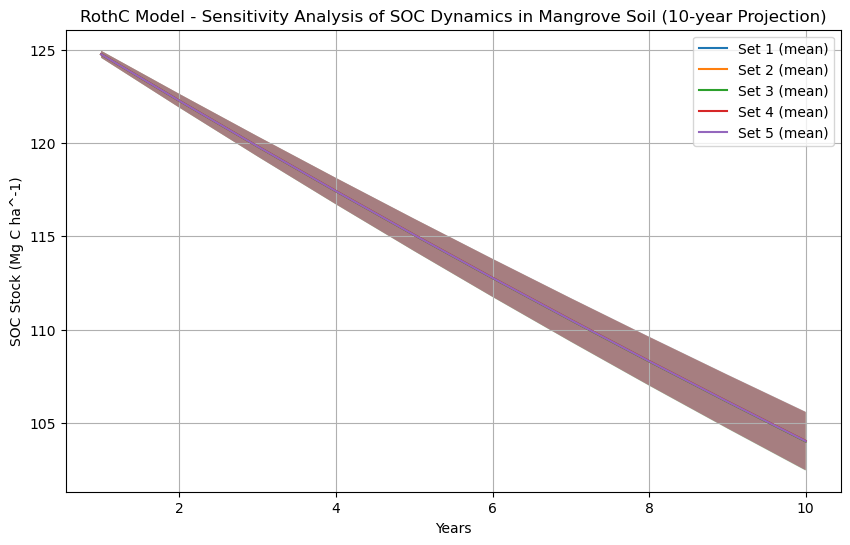

In [11]:
# Define 5 different sets of constants for sensitivity analysis (RothC model fractions)
constants_sets = [
    {"DPM_frac": 0.10, "RPM_frac": 0.15, "BIO_frac": 0.25, "HUM_frac": 0.50, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}, 
    {"DPM_frac": 0.12, "RPM_frac": 0.10, "BIO_frac": 0.28, "HUM_frac": 0.50, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}, 
    {"DPM_frac": 0.08, "RPM_frac": 0.20, "BIO_frac": 0.22, "HUM_frac": 0.50, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}, 
    {"DPM_frac": 0.06, "RPM_frac": 0.14, "BIO_frac": 0.30, "HUM_frac": 0.50, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}, 
    {"DPM_frac": 0.07, "RPM_frac": 0.13, "BIO_frac": 0.25, "HUM_frac": 0.55, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}
]

# RothC model simulation function for SOC decomposition over time
def rothc_decomposition(SOC_Stock_mean, DPM_frac, RPM_frac, BIO_frac, HUM_frac):
    # Define constants (can be adjusted based on the literature for mangrove soils)
    decomposition_rate = 0.02  # Example decomposition rate for illustration
    years = np.arange(1, 11)  # 10-year simulation (adjust as needed)
    SOC_stock = []

    for year in years:
        # Simulation of organic carbon decomposition over time for each fraction
        DPM = SOC_Stock_mean * DPM_frac * decomposition_rate
        RPM = SOC_Stock_mean * RPM_frac * decomposition_rate
        BIO = SOC_Stock_mean * BIO_frac * decomposition_rate
        HUM = SOC_Stock_mean * HUM_frac * decomposition_rate

        # Calculate total SOC loss for each fraction
        SOC_loss = DPM + RPM + BIO + HUM
        SOC_Stock_mean -= SOC_loss  # Update SOC stock for the next year

        SOC_stock.append(SOC_Stock_mean)
    
    return years, SOC_stock

# Perform sensitivity analysis for each set of constants
num_simulations = 10000  # Number of Monte Carlo simulations

plt.figure(figsize=(10, 6))
for i, consts in enumerate(constants_sets):
    # Monte Carlo simulations for each scenario
    all_SOC_stocks = []
    for _ in range(num_simulations):
        # Sample values from normal distribution for each fraction based on mean and std
        DPM_sample = np.random.normal(consts["DPM_frac"], consts["DPM_std"])
        RPM_sample = np.random.normal(consts["RPM_frac"], consts["RPM_std"])
        BIO_sample = np.random.normal(consts["BIO_frac"], consts["BIO_std"])
        HUM_sample = np.random.normal(consts["HUM_frac"], consts["HUM_std"])

        # Ensure values are valid (fractions should be between 0 and 1)
        DPM_sample = np.clip(DPM_sample, 0, 1)
        RPM_sample = np.clip(RPM_sample, 0, 1)
        BIO_sample = np.clip(BIO_sample, 0, 1)
        HUM_sample = np.clip(HUM_sample, 0, 1)

        # Run RothC model with the sampled fractions
        years, SOC_stock = rothc_decomposition(
            SOC_Stock_mean, 
            DPM_sample, 
            RPM_sample, 
            BIO_sample, 
            HUM_sample
        )
        all_SOC_stocks.append(SOC_stock)

    # Plot results for each constant set
    all_SOC_stocks = np.array(all_SOC_stocks)
    mean_SOC = np.mean(all_SOC_stocks, axis=0)
    std_SOC = np.std(all_SOC_stocks, axis=0)

    # Plot the mean SOC stock and the shaded area for standard deviation
    plt.plot(years, mean_SOC, label=f"Set {i+1} (mean)")
    plt.fill_between(years, mean_SOC - std_SOC, mean_SOC + std_SOC, alpha=0.3)

# Customize plot
plt.title("RothC Model - Sensitivity Analysis of SOC Dynamics in Mangrove Soil (10-year Projection)")
plt.xlabel("Years")
plt.ylabel("SOC Stock (Mg C ha^-1)")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
SOC_Stock_mean

127.29171999999998

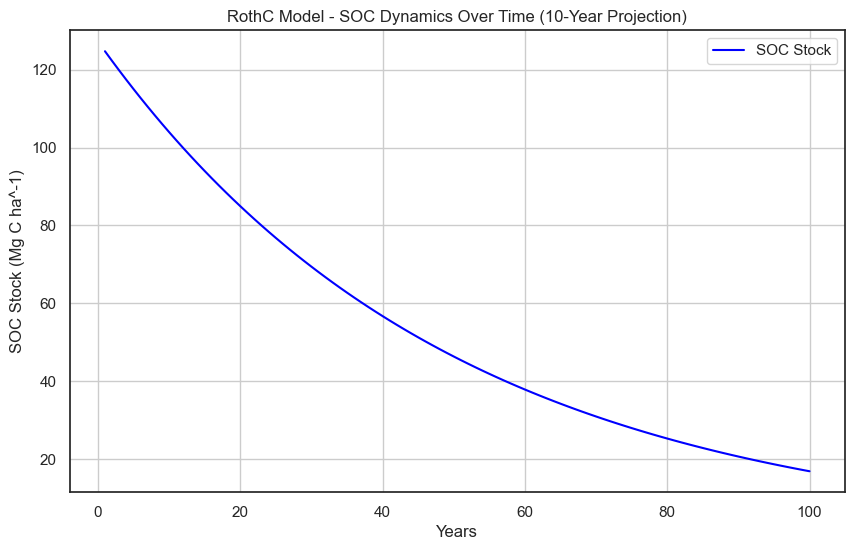

In [49]:
import numpy as np
import matplotlib.pyplot as plt

constants = {
    "DPM_frac": 0.10,
    "RPM_frac": 0.15,
    "BIO_frac": 0.25,
    "HUM_frac": 0.50
}


# RothC model simulation function for SOC decomposition over time
def rothc_decomposition(SOC_Stock_mean, DPM_frac, RPM_frac, BIO_frac, HUM_frac):
    # Define constants (adjustable based on literature for mangrove soils)
    decomposition_rate = 0.02  # Example decomposition rate
    years = np.arange(1, 101)  # 10-year simulation
    SOC_stock = []

    for year in years:
        # Calculate decomposition for each fraction
        DPM = SOC_Stock_mean * DPM_frac * decomposition_rate
        RPM = SOC_Stock_mean * RPM_frac * decomposition_rate
        BIO = SOC_Stock_mean * BIO_frac * decomposition_rate
        HUM = SOC_Stock_mean * HUM_frac * decomposition_rate

        # Total SOC loss for the year
        SOC_loss = DPM + RPM + BIO + HUM
        SOC_Stock_mean -= SOC_loss  # Update SOC stock for the next year

        SOC_stock.append(SOC_Stock_mean)
    
    return years, SOC_stock

# Run the model with the predefined constants
years, SOC_stock = rothc_decomposition(
    SOC_Stock_mean,
    constants["DPM_frac"],
    constants["RPM_frac"],
    constants["BIO_frac"],
    constants["HUM_frac"]
)

# Plot the SOC stock over time
plt.figure(figsize=(10, 6))
plt.plot(years, SOC_stock, label="SOC Stock", color="blue")
plt.title("RothC Model - SOC Dynamics Over Time (10-Year Projection)")
plt.xlabel("Years")
plt.ylabel("SOC Stock (Mg C ha^-1)")
plt.legend()
plt.grid(True)
plt.show()

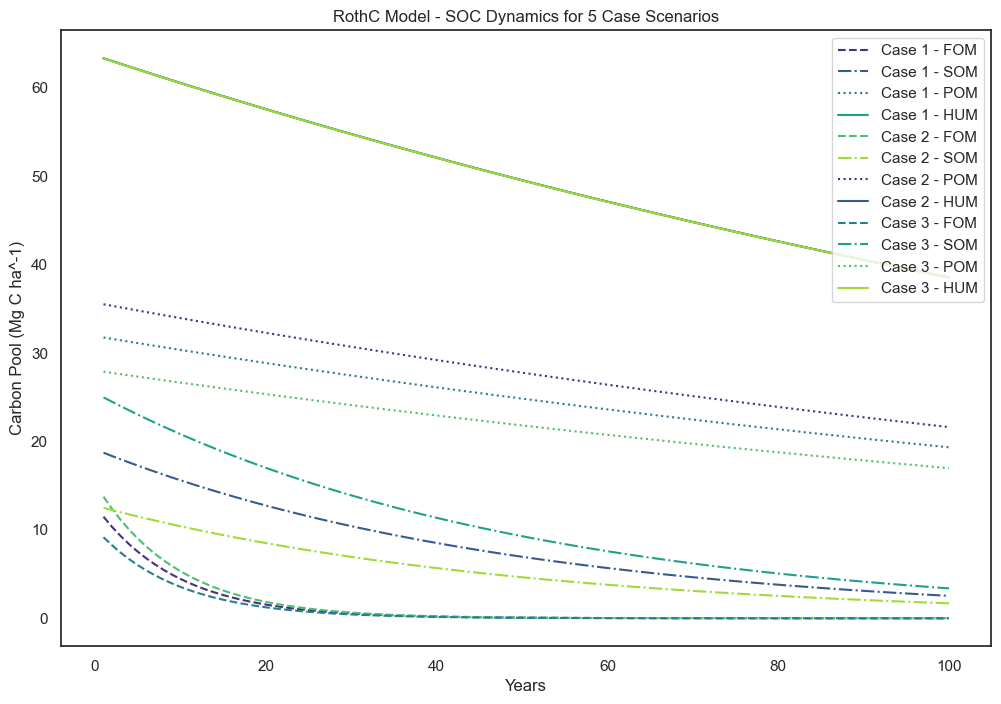

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants for the RothC model (these may need to be adjusted for your region)
FOM_decomp_rate = 0.1  # Fast Organic Matter (FOM) decomposition rate (per year)
SOM_decomp_rate = 0.02  # Slow Organic Matter (SOM) decomposition rate (per year)
POM_decomp_rate = 0.005  # Passive Organic Matter (POM) decomposition rate (per year)

# Time frame for the simulation (in years)
years = np.arange(1, 101)  # 100 years simulation

# Constants for different cases (fractions and standard deviations)
constants_sets = [
    {"DPM_frac": 0.10, "RPM_frac": 0.15, "BIO_frac": 0.25, "HUM_frac": 0.50, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}, 
    {"DPM_frac": 0.12, "RPM_frac": 0.10, "BIO_frac": 0.28, "HUM_frac": 0.50, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}, 
    {"DPM_frac": 0.08, "RPM_frac": 0.20, "BIO_frac": 0.22, "HUM_frac": 0.50, 
     "DPM_std": 0.02, "RPM_std": 0.03, "BIO_std": 0.04, "HUM_std": 0.05}, 
    ]

# Initial Soil Organic Carbon (SOC) values
SOC_stock = 127.292  # Soil Organic Carbon Stock in Mg C ha^-1 (average)

# Function to simulate the RothC model with the different pool fractions
def rothc_model_simulation(constants, years):
    # Initial carbon pools (Mg C ha^-1) derived from SOC values
    DPM_init = SOC_stock * constants["DPM_frac"]
    RPM_init = SOC_stock * constants["RPM_frac"]
    BIO_init = SOC_stock * constants["BIO_frac"]
    HUM_init = SOC_stock * constants["HUM_frac"]
    
    # Standard deviations for variability in the initial pools
    DPM_std = constants["DPM_std"]
    RPM_std = constants["RPM_std"]
    BIO_std = constants["BIO_std"]
    HUM_std = constants["HUM_std"]
    
    # Simulate variability in the initial pools
    DPM_init_vals = np.random.normal(DPM_init, DPM_std)
    RPM_init_vals = np.random.normal(RPM_init, RPM_std)
    BIO_init_vals = np.random.normal(BIO_init, BIO_std)
    HUM_init_vals = np.random.normal(HUM_init, HUM_std)

    # Initializing the pools
    FOM_pool = DPM_init_vals
    SOM_pool = RPM_init_vals
    POM_pool = BIO_init_vals
    HUM_pool = HUM_init_vals
    
    FOM_result = []
    SOM_result = []
    POM_result = []
    HUM_result = []
    
    # Simulate over time
    for year in years:
        # Decompose the pools
        FOM_loss = FOM_pool * FOM_decomp_rate
        SOM_loss = SOM_pool * SOM_decomp_rate
        POM_loss = POM_pool * POM_decomp_rate
        HUM_loss = HUM_pool * 0.005  # Assume same for HUM as in RothC model
        
        # Update pools
        FOM_pool -= FOM_loss
        SOM_pool -= SOM_loss
        POM_pool -= POM_loss
        HUM_pool -= HUM_loss
        
        # Store results for each year (append the pool values)
        FOM_result.append(FOM_pool)
        SOM_result.append(SOM_pool)
        POM_result.append(POM_pool)
        HUM_result.append(HUM_pool)
    
    return np.array(FOM_result), np.array(SOM_result), np.array(POM_result), np.array(HUM_result)

# Generate the plot for each of the 5 case scenarios
sns.set_theme(style="white", palette="viridis")

plt.figure(figsize=(12, 8))

for i, constants in enumerate(constants_sets):
    FOM_result, SOM_result, POM_result, HUM_result = rothc_model_simulation(constants, years)
    
    plt.plot(years, FOM_result, label=f"Case {i+1} - FOM", linestyle="--")
    plt.plot(years, SOM_result, label=f"Case {i+1} - SOM", linestyle="-.")
    plt.plot(years, POM_result, label=f"Case {i+1} - POM", linestyle=":")
    plt.plot(years, HUM_result, label=f"Case {i+1} - HUM", linestyle="-")

# Customize plot
plt.title("RothC Model - SOC Dynamics for 5 Case Scenarios")
plt.xlabel("Years")
plt.ylabel("Carbon Pool (Mg C ha^-1)")
plt.legend()

# Save the figure
plt.savefig("SOC_Dynamics_RothC_5_Case_Scenarios.png", dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()


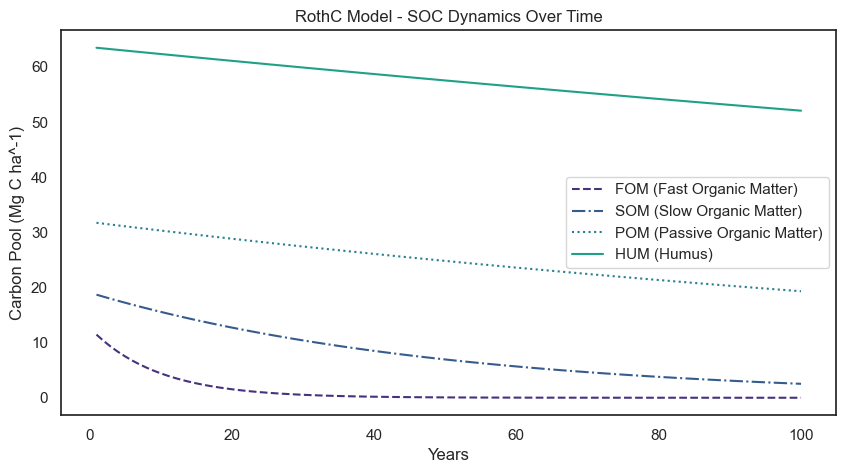

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the RothC model (can be adjusted based on your region)
FOM_decomp_rate = 0.1  # Fast Organic Matter (FOM) decomposition rate (per year)
SOM_decomp_rate = 0.02  # Slow Organic Matter (SOM) decomposition rate (per year)
POM_decomp_rate = 0.005  # Passive Organic Matter (POM) decomposition rate (per year)
HUM_decomp_rate = 0.002  # Humus decomposition rate (per year)

# Time frame for the simulation (in years)
years = np.arange(1, 101)  # 100 years simulation

# Constants for initial conditions of the soil organic carbon pools
SOC_stock = 127.292  # Soil Organic Carbon Stock in Mg C ha^-1 (average)

# Fraction of total SOC for each pool (these are typical values, can be adjusted)
DPM_frac = 0.10  # Fraction of total SOC in the FOM pool (Fast Organic Matter)
RPM_frac = 0.15  # Fraction of total SOC in the SOM pool (Slow Organic Matter)
BIO_frac = 0.25  # Fraction of total SOC in the POM pool (Passive Organic Matter)
HUM_frac = 0.50  # Fraction of total SOC in the HUM pool (Humus)

# Standard deviations for variability in the initial pools
DPM_std = 0.02
RPM_std = 0.03
BIO_std = 0.04
HUM_std = 0.05

# Function to simulate the RothC model with the different pool fractions
def rothc_model(SOC_stock, years, FOM_decomp_rate, SOM_decomp_rate, POM_decomp_rate, HUM_decomp_rate):
    # Initial carbon pools (Mg C ha^-1) derived from SOC values
    DPM_init = SOC_stock * DPM_frac
    RPM_init = SOC_stock * RPM_frac
    BIO_init = SOC_stock * BIO_frac
    HUM_init = SOC_stock * HUM_frac

    # Standard deviations for variability in the initial pools
    DPM_init_vals = np.random.normal(DPM_init, DPM_std)
    RPM_init_vals = np.random.normal(RPM_init, RPM_std)
    BIO_init_vals = np.random.normal(BIO_init, BIO_std)
    HUM_init_vals = np.random.normal(HUM_init, HUM_std)

    # Initializing the pools
    FOM_pool = DPM_init_vals
    SOM_pool = RPM_init_vals
    POM_pool = BIO_init_vals
    HUM_pool = HUM_init_vals
    
    # Lists to store the results
    FOM_result = []
    SOM_result = []
    POM_result = []
    HUM_result = []
    
    # Simulate over time
    for year in years:
        # Decompose the pools
        FOM_loss = FOM_pool * FOM_decomp_rate
        SOM_loss = SOM_pool * SOM_decomp_rate
        POM_loss = POM_pool * POM_decomp_rate
        HUM_loss = HUM_pool * HUM_decomp_rate
        
        # Update pools
        FOM_pool -= FOM_loss
        SOM_pool -= SOM_loss
        POM_pool -= POM_loss
        HUM_pool -= HUM_loss
        
        # Store results for each year
        FOM_result.append(FOM_pool)
        SOM_result.append(SOM_pool)
        POM_result.append(POM_pool)
        HUM_result.append(HUM_pool)
    
    return np.array(FOM_result), np.array(SOM_result), np.array(POM_result), np.array(HUM_result)

# Run the RothC model
FOM_result, SOM_result, POM_result, HUM_result = rothc_model(SOC_stock, years, FOM_decomp_rate, SOM_decomp_rate, POM_decomp_rate, HUM_decomp_rate)

# Plot the results
plt.figure(figsize=(10, 5))

plt.plot(years, FOM_result, label="FOM (Fast Organic Matter)", linestyle="--")
plt.plot(years, SOM_result, label="SOM (Slow Organic Matter)", linestyle="-.")
plt.plot(years, POM_result, label="POM (Passive Organic Matter)", linestyle=":")
plt.plot(years, HUM_result, label="HUM (Humus)", linestyle="-")

plt.title("RothC Model - SOC Dynamics Over Time")
plt.xlabel("Years")
plt.ylabel("Carbon Pool (Mg C ha^-1)")
plt.legend()
# Show plot
plt.show()


## Century Model

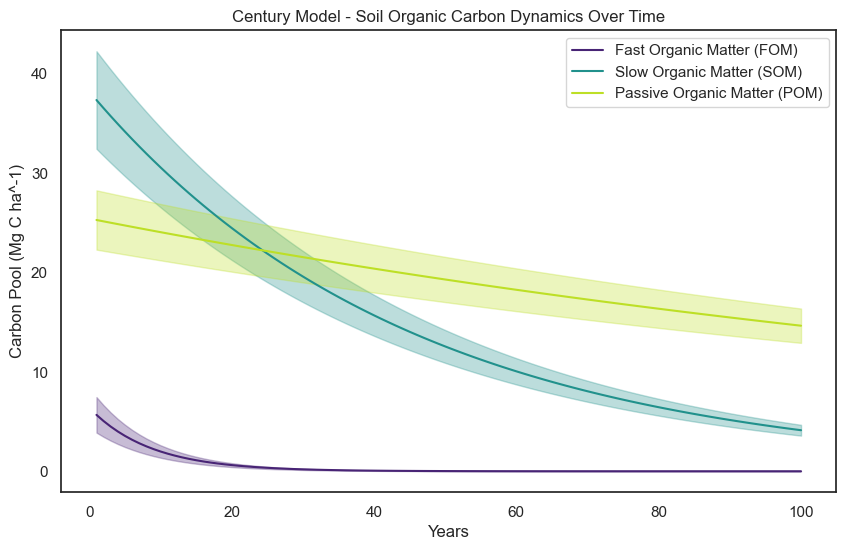

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants for the Century model (these may need to be adjusted for your region)
FOM_decomp_rate = 0.1  # Fast Organic Matter (FOM) decomposition rate (per year)
SOM_decomp_rate = 0.02  # Slow Organic Matter (SOM) decomposition rate (per year)
POM_decomp_rate = 0.005  # Passive Organic Matter (POM) decomposition rate (per year)

# Your provided SOC values
SOCC = 4.58  # Soil Organic Carbon Concentration in % (average)
SOCD = 0.064  # Soil Organic Carbon Density in g C cm^-3 (average)
SOC_stock = 127.292  # Soil Organic Carbon Stock in Mg C ha^-1 (average)

# Convert SOC density to Mg C ha^-1 for initial pool values
initial_SOC = SOC_stock   # Convert g C cm^-3 to Mg C ha^-1 (approximated for depth 1 m)

# Initial carbon pools (Mg C ha^-1) derived from SOC values
FOM_init = initial_SOC * 0.05  # Example fraction, can be adjusted
SOM_init = initial_SOC * 0.30  # Example fraction, can be adjusted
POM_init = initial_SOC * 0.20  # Example fraction, can be adjusted

# Environmental factors (e.g., temperature and moisture effect on decomposition)
temperature_factor = 1.1  # Assume 10% faster decomposition due to warmer temperatures
moisture_factor = 1.0  # No change due to moisture

# Time frame for the simulation (in years)
years = np.arange(1, 101)  # 100 years simulation
num_simulations = 10000  # Number of Monte Carlo simulations

# Function to simulate the Century model
def century_model_simulation(FOM_init, SOM_init, POM_init, years, FOM_decomp_rate, SOM_decomp_rate, POM_decomp_rate):
    FOM_pool = FOM_init
    SOM_pool = SOM_init
    POM_pool = POM_init
    
    FOM_result = []
    SOM_result = []
    POM_result = []
    
    # Simulate over time
    for year in years:
        # Decompose the pools
        FOM_loss = FOM_pool * FOM_decomp_rate * temperature_factor * moisture_factor
        SOM_loss = SOM_pool * SOM_decomp_rate * temperature_factor * moisture_factor
        POM_loss = POM_pool * POM_decomp_rate * temperature_factor * moisture_factor
        
        # Update pools
        FOM_pool -= FOM_loss
        SOM_pool -= SOM_loss
        POM_pool -= POM_loss
        
        # Store results
        FOM_result.append(FOM_pool)
        SOM_result.append(SOM_pool)
        POM_result.append(POM_pool)
    
    return FOM_result, SOM_result, POM_result

# Monte Carlo simulation with variation in initial pools and decomposition rates
FOM_init_vals = np.random.normal(FOM_init, 2, num_simulations)  # Varying FOM initial values
SOM_init_vals = np.random.normal(SOM_init, 5, num_simulations)  # Varying SOM initial values
POM_init_vals = np.random.normal(POM_init, 3, num_simulations)  # Varying POM initial values

# Running simulations for each case
all_FOM_results = []
all_SOM_results = []
all_POM_results = []

for i in range(num_simulations):
    FOM_result, SOM_result, POM_result = century_model_simulation(
        FOM_init_vals[i], SOM_init_vals[i], POM_init_vals[i], years, FOM_decomp_rate, SOM_decomp_rate, POM_decomp_rate
    )
    all_FOM_results.append(FOM_result)
    all_SOM_results.append(SOM_result)
    all_POM_results.append(POM_result)

# Convert results to arrays for easier manipulation
all_FOM_results = np.array(all_FOM_results)
all_SOM_results = np.array(all_SOM_results)
all_POM_results = np.array(all_POM_results)

# Calculate the mean and standard deviation for each year across all simulations
mean_FOM = np.mean(all_FOM_results, axis=0)
std_FOM = np.std(all_FOM_results, axis=0)

mean_SOM = np.mean(all_SOM_results, axis=0)
std_SOM = np.std(all_SOM_results, axis=0)

mean_POM = np.mean(all_POM_results, axis=0)
std_POM = np.std(all_POM_results, axis=0)

# Set Seaborn theme to white background with no grid
sns.set_theme(style="white", palette="viridis")

# Plot the results with Seaborn viridis color map
plt.figure(figsize=(10, 6))

# Use the 'viridis' color palette for lines
plt.plot(years, mean_FOM, label="Fast Organic Matter (FOM)", color=sns.color_palette("viridis", as_cmap=True)(0.1))
plt.fill_between(years, mean_FOM - std_FOM, mean_FOM + std_FOM, color=sns.color_palette("viridis", as_cmap=True)(0.1), alpha=0.3)

plt.plot(years, mean_SOM, label="Slow Organic Matter (SOM)", color=sns.color_palette("viridis", as_cmap=True)(0.5))
plt.fill_between(years, mean_SOM - std_SOM, mean_SOM + std_SOM, color=sns.color_palette("viridis", as_cmap=True)(0.5), alpha=0.3)

plt.plot(years, mean_POM, label="Passive Organic Matter (POM)", color=sns.color_palette("viridis", as_cmap=True)(0.9))
plt.fill_between(years, mean_POM - std_POM, mean_POM + std_POM, color=sns.color_palette("viridis", as_cmap=True)(0.9), alpha=0.3)

# Customizing plot with no grid
plt.title("Century Model - Soil Organic Carbon Dynamics Over Time")
plt.xlabel("Years")
plt.ylabel("Carbon Pool (Mg C ha^-1)")
plt.legend()

# Save the figure
plt.savefig("SOC_Dynamics_Century_Model_white_no_grid.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Factor Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bulk Density  25 non-null     float64
 1   Moisture      25 non-null     float64
 2   Sand          25 non-null     float64
 3   Silt          25 non-null     float64
 4   Clay          25 non-null     float64
 5   pH            25 non-null     float64
 6   EC            25 non-null     float64
 7   OM            25 non-null     float64
 8   TN            25 non-null     float64
 9   CEC           25 non-null     float64
 10  Depth         25 non-null     object 
 11  Sampling      25 non-null     object 
 12  SOCC          25 non-null     float64
 13  SOCD          25 non-null     float64
 14  SOC Stock     25 non-null     float64
dtypes: float64(13), object(2)
memory usage: 3.1+ KB


In [24]:
physico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Harbaria to Munshiganj
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample          25 non-null     object 
 1   Bulk Density    25 non-null     float64
 2   Moisture        25 non-null     float64
 3   Sand            25 non-null     float64
 4   Silt            25 non-null     float64
 5   Clay            25 non-null     float64
 6   Textural Class  25 non-null     object 
 7   pH              25 non-null     float64
 8   EC              25 non-null     float64
 9   OM              25 non-null     float64
 10  TN              25 non-null     float64
 11  CEC             25 non-null     float64
 12  Depth           25 non-null     object 
dtypes: float64(10), object(3)
memory usage: 2.7+ KB


In [27]:
pc = physico[['Bulk Density', 'Moisture', 'Sand', 'Silt', 'Clay', 'pH', 'EC', 'OM',
       'TN', 'CEC']]
pc.head()

,Bulk Density,Moisture,Sand,Silt,Clay,pH,EC,OM,TN,CEC
Sampling,,,,,,,,,,
Harbaria,1.52,32.82,6.40,55.42,38.17,8.33,3.79,2.389,0.14,27.15
Harbaria,1.48,32.67,8.42,55.17,36.40,8.20,3.48,3.562,0.13,27.10
Harbaria,1.40,34.92,3.88,61.22,34.88,8.51,3.19,6.441,0.09,26.86
Harbaria,1.49,37.57,3.90,65.71,30.38,8.39,3.38,12.621,0.08,25.50
Harbaria,1.37,38.02,3.93,60.93,35.12,8.45,3.27,15.698,0.06,29.87


Factor Loadings:
    Bulk Density  Moisture      Sand      Silt      Clay        pH        EC  \
0      0.268792  0.139935  0.332398  0.952097 -0.998127  0.442527  0.039432   
1      0.648929 -0.609129  0.641847 -0.198176 -0.020460 -0.547312  0.248747   

         OM        TN       CEC  
0  0.315774 -0.433289 -0.868101  
1 -0.838181  0.779560 -0.084993  


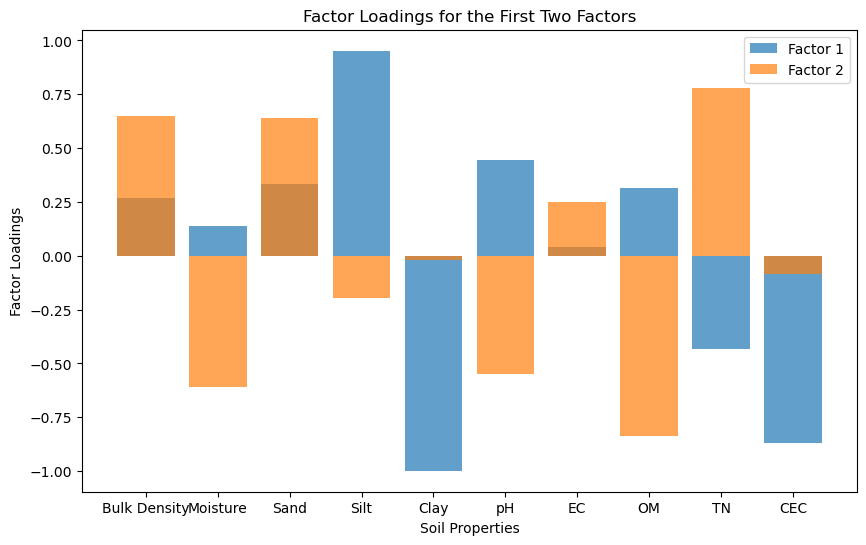

In [30]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data (important for factor analysis)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pc)

# Step 2: Apply Factor Analysis
n_factors = 2  # Number of latent factors
factor = FactorAnalysis(n_components=n_factors)
data_factors = factor.fit_transform(data_scaled)

# Step 3: Display the factor loadings
loadings = factor.components_
loadings_df = pd.DataFrame(loadings, columns=pc.columns)

print("Factor Loadings:\n", loadings_df)

# Step 4: Visualize the factor loadings (optional)
plt.figure(figsize=(10, 6))
plt.bar(pc.columns, loadings[0], alpha=0.7, label="Factor 1")
plt.bar(pc.columns, loadings[1], alpha=0.7, label="Factor 2")
plt.xlabel('Soil Properties')
plt.ylabel('Factor Loadings')
plt.title('Factor Loadings for the First Two Factors')
plt.legend()
plt.show()

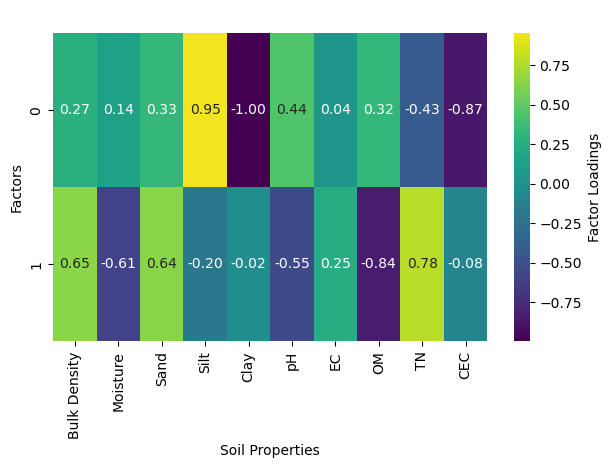

In [39]:
plt.figure(figsize=(7, 4))
sns.heatmap(loadings_df, annot=True, cmap='viridis', center=0, fmt='.2f', cbar_kws={'label': 'Factor Loadings'})

# Step 5: Customize the plot
plt.title(' ', fontsize=14)
plt.xlabel('Soil Properties', fontsize=10)
plt.ylabel('Factors', fontsize=10)

plt.savefig('Factor_heatmap.png', dpi=1000)

# Show the plot
plt.show()